# Delivery_time -> Predict delivery time using sorting time

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
dt=pd.read_csv("Downloads/delivery_time.csv")
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
dt.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
dt.shape

(21, 2)

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

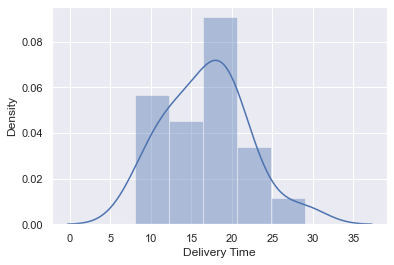

In [8]:
sns.distplot(dt["Delivery Time"])

In [9]:
dt["log_dt"]=np.log(dt["Delivery Time"])

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_dt', ylabel='Density'>

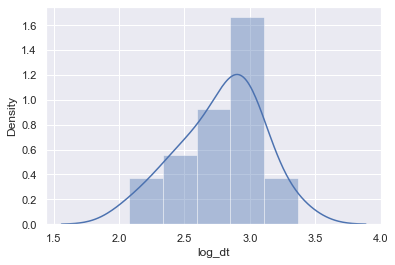

In [10]:
sns.distplot(dt["log_dt"])

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

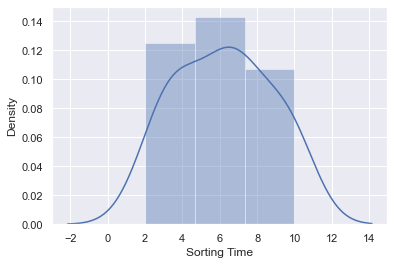

In [11]:
sns.distplot(dt["Sorting Time"])

In [12]:
dt["log_sorting"]=np.log(dt["Sorting Time"])

C:\Users\home\AppData\Local\conda\conda\envs\py3-TF2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sorting', ylabel='Density'>

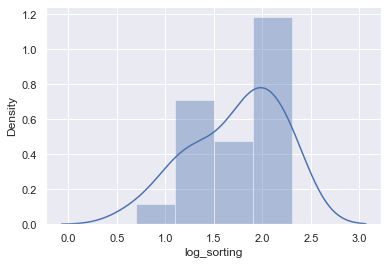

In [13]:
sns.distplot(dt['log_sorting'])

In [14]:
dt.head()

,Delivery Time,Sorting Time,log_dt,log_sorting
0,21.00,10,3.044522,2.302585
1,13.50,4,2.602690,1.386294
2,19.75,6,2.983153,1.791759
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


In [16]:
dl_time=dt.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis=1)

In [17]:
dtnorm_model=smf.ols("Delivery_Time~Sorting_Time",data=dl_time).fit()

In [18]:
dtlog_model=smf.ols("log_dt~log_sorting",data=dt).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

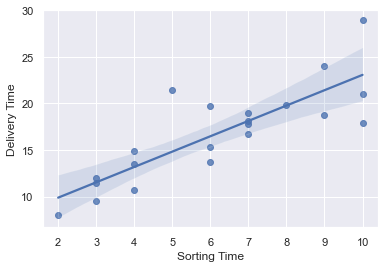

In [19]:
sns.regplot(x="Sorting Time", y="Delivery Time", data=dt)

<AxesSubplot:xlabel='log_sorting', ylabel='log_dt'>

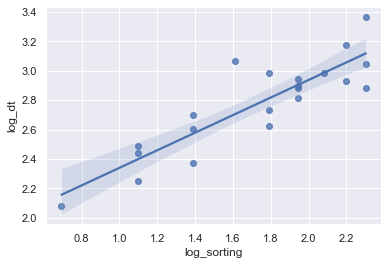

In [20]:
sns.regplot(x="log_sorting", y="log_dt", data=dt)

In [21]:
dtnorm_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [22]:
dtlog_model.params

Intercept      1.741987
log_sorting    0.597522
dtype: float64

In [23]:
(dtnorm_model.rsquared,dtnorm_model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [24]:
(dtlog_model.rsquared, dtlog_model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [25]:
accuracy=dtlog_model.rsquared

eval_env: 1


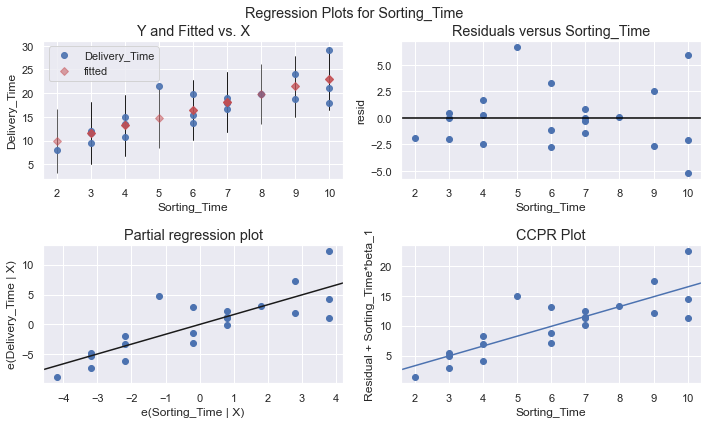

In [26]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(dtnorm_model,"Sorting_Time", fig=fig)

eval_env: 1


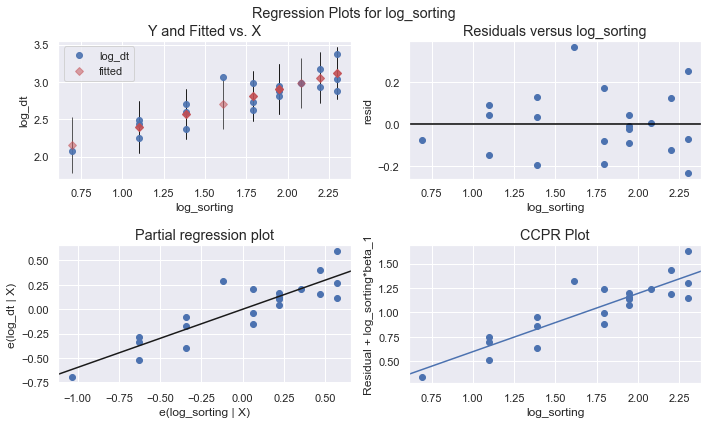

In [27]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(dtlog_model,"log_sorting", fig=fig)

In [29]:
## Log Model has more accuracy than normal model
print("This model ca predict Dleivery time for Sorting time in range:",(dt["Sorting Time"].min(),dt["Sorting Time"].max()))
print("This model take Sorting time as input and Predict delivery time with Accuracy of :",accuracy*100,"%")
newdata1=pd.Series([(int(input("Enter sorting time: ")))])
data_deltime=pd.DataFrame(newdata1,columns=["log_sorting"])
Ndel_time=dtlog_model.predict((np.log(data_deltime)))
print("Based on your Sorting time Expected Delivery time is :", (np.exp((Ndel_time.values)[0])),"minutes")

This model ca predict Dleivery time for Sorting time in range: (2, 10)
This model take Sorting time as input and Predict delivery time with Accuracy of : 77.216134926874 %
Enter sorting time: 5
Based on your Sorting time Expected Delivery time is : 14.9343238541469 minutes
